In [3]:
import pandas as pd

In [4]:
import numpy as np

In [8]:
rend_esc = pd.read_csv('\\Users\luisr\Desktop\Repository\IBM_courses\Personal Work\Data Frames\Work\\rend_esc_cleaned.csv').drop('Unnamed: 0', axis=1)

# Hiphotesis Testing for 'Rendimento Escolar' Table.

### Extracting 'Total Abandonment proportion' column and location column

In [129]:
rend_esc.columns

Index(['Ano', 'Região', 'UF', 'Código do Município', 'Nome do Município',
       'Localização', 'Rede', 'Código da Escola', 'Nome da Escola',
       'Aprovação no 1º Ano do Ensino Fundamental',
       'Aprovação na 1ª série/2º Ano', 'Aprovação na 2ª série/3º Ano',
       'Aprovação na 3ª série/4º Ano', 'Aprovaçãona 4ª série/5º Ano',
       'Aprovação na 5ª série/6º Ano', 'Aprovação na 6ª série/7º Ano',
       'Aprovação na 7ª série/8º Ano', 'Aprovação na 8ª série/9º Ano',
       'Aprovação 1ª a 4ª  Série/1º a 5º Ano',
       'Aprovação 5ª a 8ª Série/ 6º ao 9º Ano', 'Total Aprovação Fundamental',
       'Aprovação na 1ª série - Médio', 'Aprovação na 2ª série - Médio',
       'Aprovação na 3ª série - Médio', 'Aprovação na 4ª série - Médio',
       'Total  Aprovação Médio Não Seriado', 'Total  Aprovação Médio',
       'Reprovação no 1º Ano do Ensino Fundamental',
       'Reprovação na 1ª série/2º Ano', 'Reprovação na 2ª série/3º Ano',
       'Reprovação na 3ª série/4º Ano', 'Reprovação na

In [139]:
cc = ['Total Abandono - Médio', 'Localização']

In [140]:
abd = rend_esc[cc[0]]

In [141]:
loc = rend_esc[cc[1]]

### Dividing abandonment rates by location (urban or rural).

In [142]:
x1 = abd[loc=='Urbana']

In [143]:
x2 = abd[loc=='Rural']

In [144]:
len(x1) + len(x2) == len(abd)

True

### Droping missing values for both samples.

In [145]:
x1.dropna(inplace=True)

In [146]:
x2.dropna(inplace=True)

## Hiphotesis:

1. Null: Average high school abandonment is the same in urban and rural areas - Ho: u1 - u2 = 0
2. Alternative: Average high school abandonment is higher in rural areas than in urban areas - H1: u1 - u2 < 0

#### We can divide our sample of high school abandonment rate by location (urban or rural area) and test wether the average abandonment rates for the two are equal or if one has higher rates than the other. In order to do that, we need to split the sample into the two groups, estimate the average and variance of each and calculate their sizes.

In [114]:
n1 = len(x1)         # sizes
n2 = len(x2)

In [115]:
u1 = x1.mean()       # averages
u2 = x2.mean()

s1 = x1.var()        # variances
s2 = x2.var()

In [116]:
[round(i, 3) for i in [n1, n2, u1, u2, s1, s2]]

[10731, 457, 5.342, 6.334, 58.461, 58.323]

#### We can see that the urban sample have lower average of high school abandonment. The question at this point should be, is the difference high enough for us to reject that the averages are equal? That's what we are going to test.

In [37]:
from scipy import stats

### Considering equal variances for populations 1 and 2.

#### As we want to test wether two averages are equal or not and we are considering equal population variances, the appropriate test is the two-sample t-test.

In [107]:
Sp = (s1*(n1 - 1) + s2*(n2 - 1)) / (n1 + n2 - 2)

In [108]:
v = n1 + n2 - 2

In [109]:
t = (u1 - u2) / (Sp * np.sqrt( 1/n1 + 1/n2 ))      # Test Statistic

In [110]:
[round(i, 3) for i in [Sp, v, t]]

[58.455, 11186, -0.355]

In [111]:
P = stats.t(v).cdf(t)
P

0.3612292735288897

#### The value of the test statistic t is inside the confidence interval t > 0.05, therefore we cannot reject the null hiphotesis. What this result means is that, if we have in fact no difference between urban/rural averages, differences lower than the one we got would appear only 36.1% of the time. We would only reject if we could find a difference in average outside the confidence interval, that is, the region of differences that appear 5% of the time, when the true population average is 0.

#### This result indicates that we can not reject that the urban/rural averages of high school abandonment might be equal against it being higher. Therefore we cannot tell if the higher value that we see for rural areas between our two samples is due to random chance or if the rural population indeed has higher school abandonment rates.

In [183]:
t_alfa = stats.t(v).ppf(0.05)
t_alfa

-1.644989859395418

In [184]:
u_alfa = t_alfa * (Sp * np.sqrt( 1/n1 + 1/n2 ))
u_alfa

-4.5928612897010135

#### We can only reject that the average abandonment rates are the same (Ho) if the rural rate of our sample is at least 4.6 percent higher than the urban rate. As the difference between u1 and u2 is negative this 4.6 value would correspond to the left limit of the 0.95 confidance region, below which we would reject our hiphotesis.

### Considering different variances.

In [99]:
v = (s1/n1 + s2/n2)**2 / ((s1/n1)**2 / (n1-1) + (s2/n2)**2 / (n2-1))

In [100]:
t = (u1 - u2) / np.sqrt( s1/n1 + s2/n2 )      # Test Statistic

In [101]:
[round(i, 3) for i in [v, t]]

[495.724, -2.719]

In [102]:
stats.t(int(v)).cdf(t)

0.0033936756430419024

#### This result indicates that we should in fact reject that the urban/rural averages of high school abandonment are equal in favor of rural areas having higher rates, as the result is lower than 0.05, our confidence level. We estimated close variances for the two groups (s1 = 58.461, s2 = 58.323). This indicates that their true variances might be equal and that we should trust our first test result. But in order to be sure, the variances of the two samples should also be tested, to confirm wether they are equivalent or not.

## Plotting

In [117]:
import matplotlib.pyplot as plt
import seaborn as sns

(array([8.464e+03, 1.726e+03, 3.770e+02, 1.220e+02, 3.000e+01, 9.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 2.000e+00]),
 array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.]),
 <a list of 10 Patch objects>)

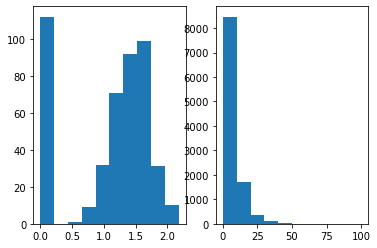

In [149]:
f = np.linspace()

fig = plt.figure()
ax0 = fig.add_subplot(1, 2, 1)
ax1 = fig.add_subplot(1, 2, 2)

ax0.hist(x2**(1/5))
ax1.hist(x1)